<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/Price_NSEI%26VIXS%26P500_Analysis_mathclasstutor_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Price NSEI Analysis with Python

In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
nsei = yf.download('^NSEI',
 start='2020-01-01',
 end='2024-07-07',
 progress=False)

In [4]:
nsei.tail(9)

Open          High           Low         Close  \
Date                                                                 
2024-06-25  23577.099609  23754.150391  23562.050781  23721.300781   
2024-06-26  23723.099609  23889.900391  23670.449219  23868.800781   
2024-06-27  23881.550781  24087.449219  23805.400391  24044.500000   
2024-06-28  24085.900391  24174.000000  23985.800781  24010.599609   
2024-07-01  23992.949219  24164.000000  23992.699219  24141.949219   
2024-07-02  24228.750000  24236.349609  24056.400391  24123.849609   
2024-07-03  24291.750000  24309.150391  24207.099609  24286.500000   
2024-07-04  24369.949219  24401.000000  24281.000000  24302.150391   
2024-07-05  24213.349609  24363.000000  24168.849609  24323.849609   

               Adj Close  Volume  
Date                              
2024-06-25  23721.300781  298100  
2024-06-26  23868.800781  287800  
2024-06-27  24044.500000  515200  
2024-06-28  24010.599609  354800  
2024-07-01  24141.949219       0  
2024-07-02  24123.849609       0  
2024-07-03  24286.500000       0  
2024-07-04  24302.150391  251200  
2024-07-05  24323.849609  298400

In [5]:
nsei.head()

Open          High           Low         Close  \
Date                                                                 
2020-01-01  12202.150391  12222.200195  12165.299805  12182.500000   
2020-01-02  12198.549805  12289.900391  12195.250000  12282.200195   
2020-01-03  12261.099609  12265.599609  12191.349609  12226.650391   
2020-01-06  12170.599609  12179.099609  11974.200195  11993.049805   
2020-01-07  12079.099609  12152.150391  12005.349609  12052.950195   

               Adj Close  Volume  
Date                              
2020-01-01  12182.500000  304100  
2020-01-02  12282.200195  407700  
2020-01-03  12226.650391  428800  
2020-01-06  11993.049805  396500  
2020-01-07  12052.950195  447800

In [6]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

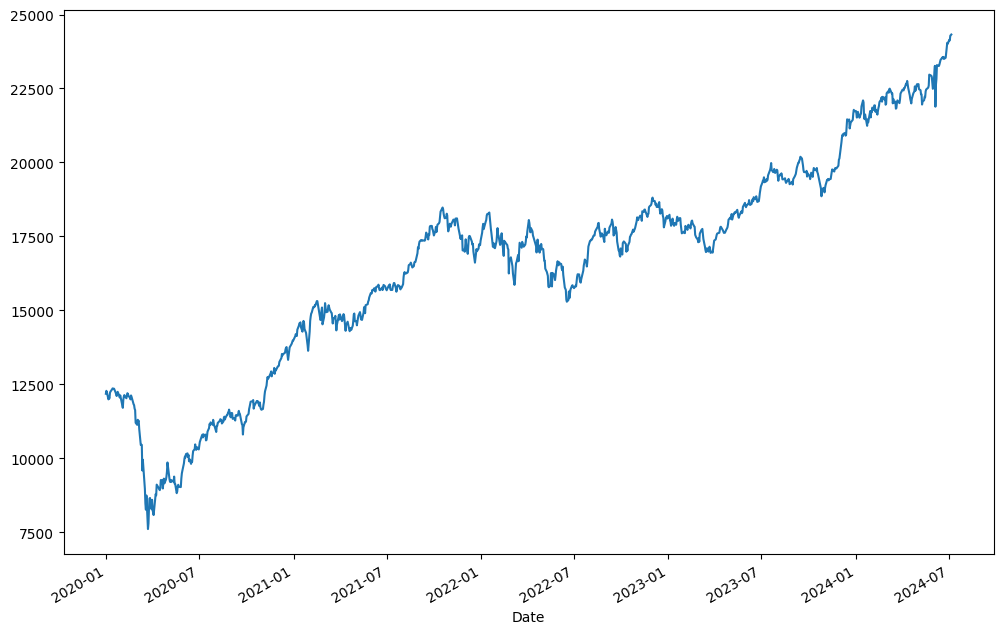

In [7]:
nsei['Close'].plot(figsize=(12,8))

<Axes: xlabel='Date'>

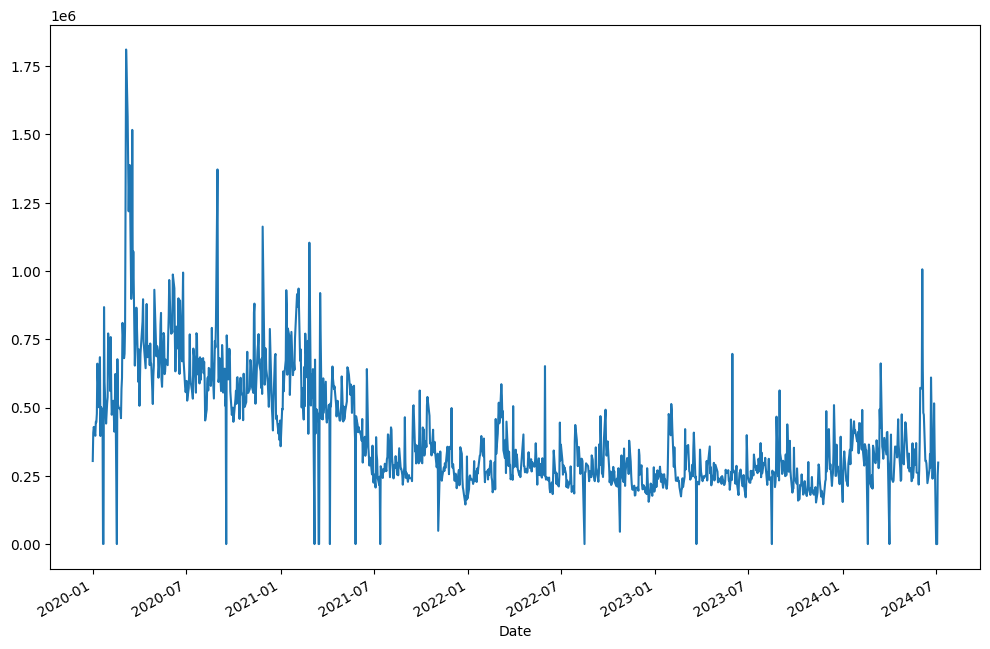

In [8]:
nsei['Volume'].plot(figsize=(12,8))

<Axes: xlabel='Date'>

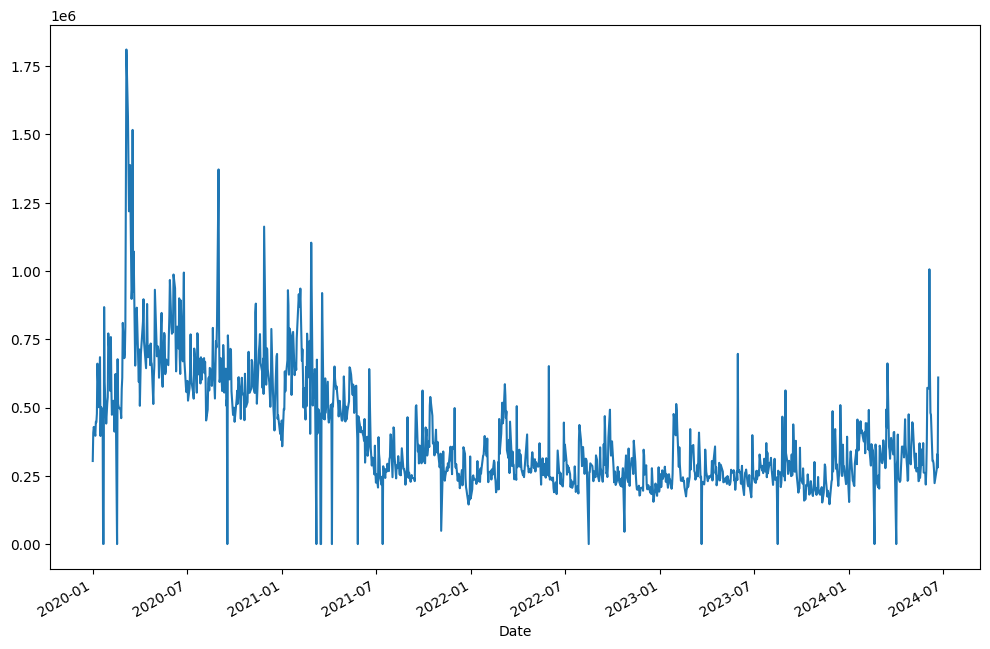

In [ ]:
nsei['Volume'].plot(figsize=(12,8))

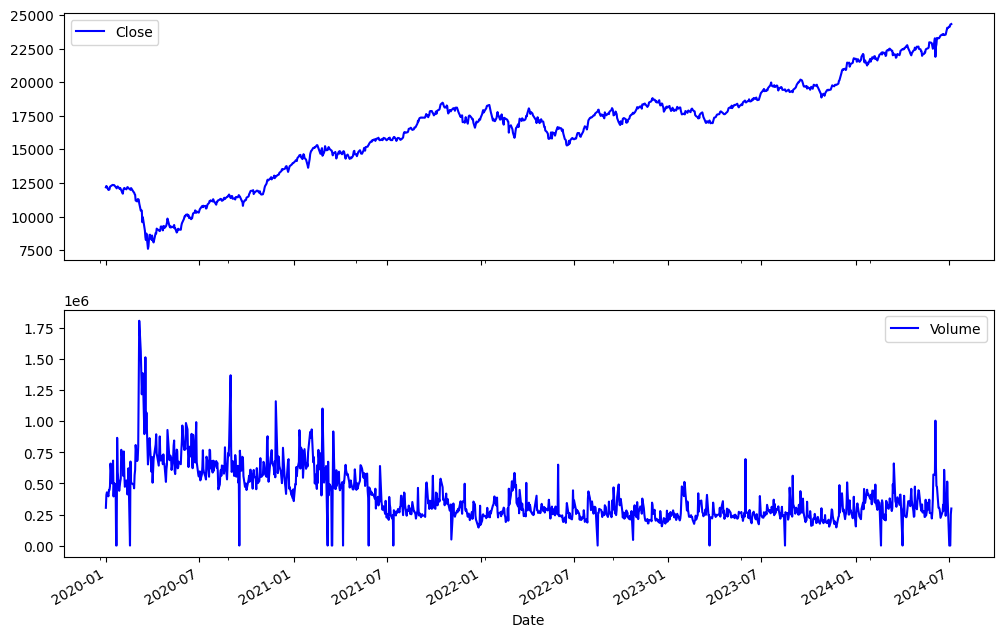

In [9]:
nsei[['Close', 'Volume']].plot(subplots=True, style='b',
figsize=(12, 8));

In [10]:
nsei.describe()

Open          High           Low         Close     Adj Close  \
count   1116.000000   1116.000000   1116.000000   1116.000000   1116.000000   
mean   16560.935881  16641.648107  16451.795502  16551.020075  16551.020075   
std     3609.338915   3607.221569   3612.240385   3611.919469   3611.919469   
min     7735.149902   8036.950195   7511.100098   7610.250000   7610.250000   
25%    14565.687744  14653.137207  14434.987549  14562.050049  14562.050049   
50%    17257.500000  17352.274414  17149.250000  17247.025391  17247.025391   
75%    18594.412109  18623.312500  18485.437012  18561.062500  18561.062500   
max    24369.949219  24401.000000  24281.000000  24323.849609  24323.849609   

             Volume  
count  1.116000e+03  
mean   3.955737e+05  
std    2.123953e+05  
min    0.000000e+00  
25%    2.499500e+05  
50%    3.148500e+05  
75%    5.130250e+05  
max    1.811000e+06

In [ ]:
nsei['simple_rtn'] = nsei.Close.pct_change()

In [11]:
nsei['log_rtn'] = np.log(nsei.Close/nsei.Close.shift(1))

array([<Axes: xlabel='Date'>], dtype=object)

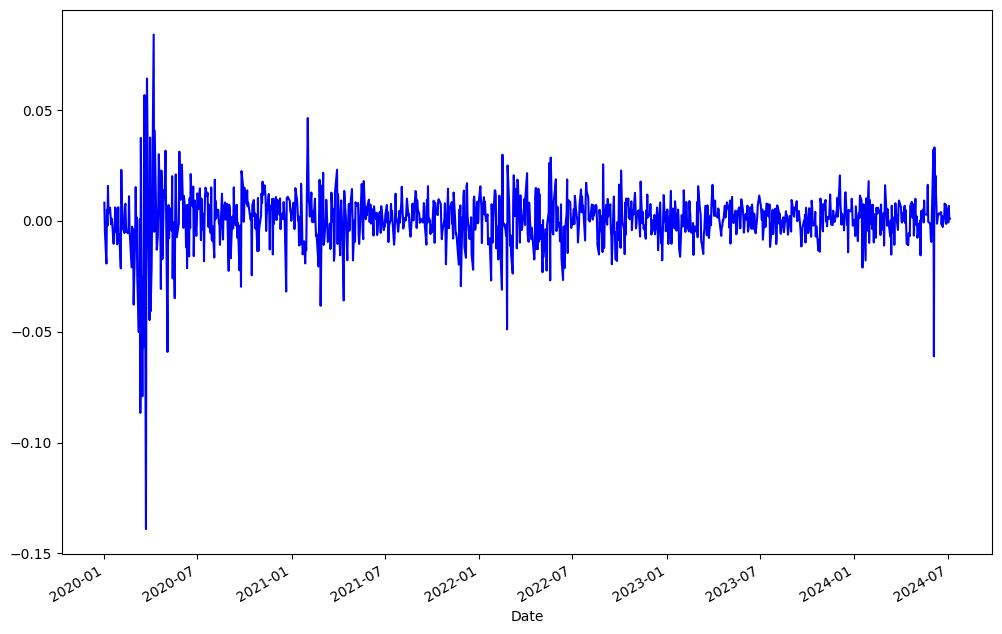

In [12]:
nsei['log_rtn'].plot(subplots=True, style='b',
figsize=(12, 8))

In [15]:
nsei['log_rtn'].tail(12)

Date
2024-06-20    0.002166
2024-06-21   -0.002800
2024-06-24    0.001563
2024-06-25    0.007764
2024-06-26    0.006199
2024-06-27    0.007334
2024-06-28   -0.001411
2024-07-01    0.005456
2024-07-02   -0.000750
2024-07-03    0.006720
2024-07-04    0.000644
2024-07-05    0.000892
Name: log_rtn, dtype: float64

In [ ]:
WINDOW_SIZE = 12
df['rolling_mean'] = nsei.price.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = nsei.price.rolling(window=WINDOW_SIZE).std()
df.plot(title='NSEI INDEX Price')

AttributeError: 'DataFrame' object has no attribute 'price'

In [16]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

In [17]:
init_notebook_mode()

In [18]:
df_rolling = nsei[['simple_rtn']].rolling(window=21) \
.agg(['mean', 'std'])

KeyError: "None of [Index(['simple_rtn'], dtype='object')] are in the [columns]"

In [19]:
df_rolling.columns = df_rolling.columns.droplevel()

NameError: name 'df_rolling' is not defined

In [ ]:
df_outliers = nsei.join(df_rolling)

In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [21]:
df = yf.download(['^NSEI', '^VIX'],
start='1985-01-01',
end='2024-07-07',
progress=False)

In [22]:
df.tail()

Price          Adj Close                Close                 High         \
Ticker             ^NSEI   ^VIX         ^NSEI   ^VIX         ^NSEI   ^VIX   
Date                                                                        
2024-07-01  24141.949219  12.22  24141.949219  12.22  24164.000000  13.26   
2024-07-02  24123.849609  12.03  24123.849609  12.03  24236.349609  12.88   
2024-07-03  24286.500000  12.09  24286.500000  12.09  24309.150391  12.23   
2024-07-04  24302.150391    NaN  24302.150391    NaN  24401.000000    NaN   
2024-07-05  24323.849609  12.48  24323.849609  12.48  24363.000000  12.61   

Price                Low                 Open           Volume       
Ticker             ^NSEI   ^VIX         ^NSEI   ^VIX     ^NSEI ^VIX  
Date                                                                 
2024-07-01  23992.699219  12.10  23992.949219  12.98       0.0  0.0  
2024-07-02  24056.400391  11.85  24228.750000  12.67       0.0  0.0  
2024-07-03  24207.099609  11.95  24291.750000  12.13       0.0  0.0  
2024-07-04  24281.000000    NaN  24369.949219    NaN  251200.0  NaN  
2024-07-05  24168.849609  11.84  24213.349609  12.37  298400.0  0.0

In [23]:
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^NSEI': 'nsei', '^VIX': 'vix'})

In [24]:
df.tail()

Ticker              nsei    vix
Date                           
2024-07-01  24141.949219  12.22
2024-07-02  24123.849609  12.03
2024-07-03  24286.500000  12.09
2024-07-04  24302.150391    NaN
2024-07-05  24323.849609  12.48

In [25]:
df['log_rtn'] = np.log(df.nsei / df.nsei.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [26]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

[Text(0.5, 1.0, 'NSEI vs. VIX ($\\rho$ = -0.21)'),
 Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'NSEI log returns')]

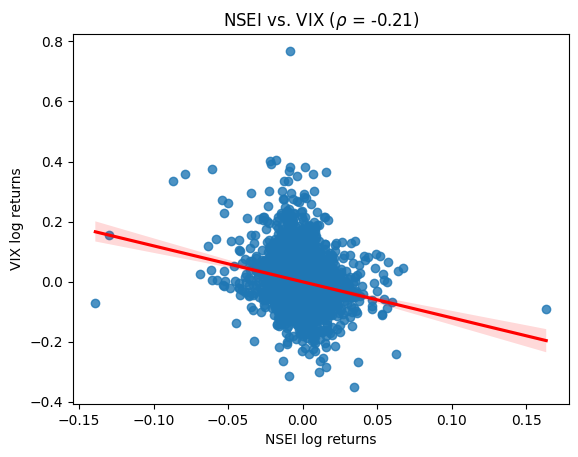

In [27]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
line_kws={'color': 'red'})
ax.set(title=f'NSEI vs. VIX ($\\rho$ = {corr_coeff:.2f})',
ylabel='VIX log returns',
xlabel='NSEI log returns')

In [28]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

<ipython-input-29-3f37f227d6dd>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Q-Q plot')

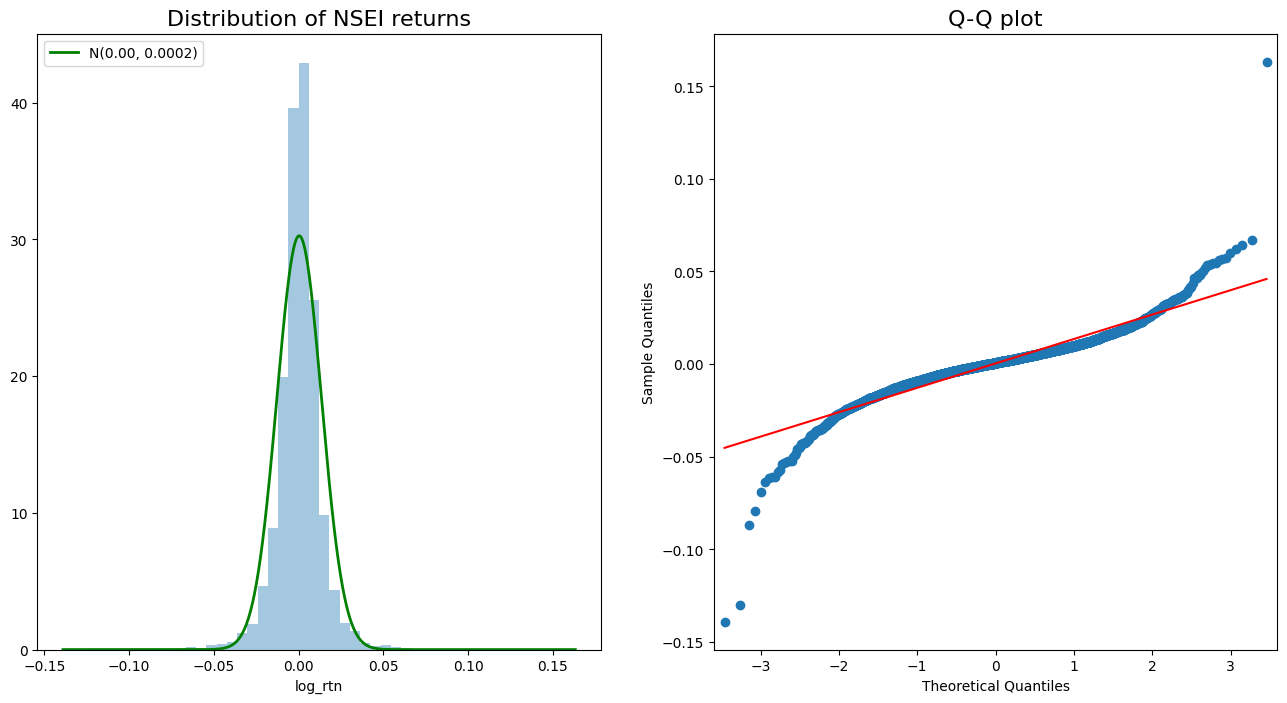

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of NSEI returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

In [30]:
df['log_rtn'].tail()

Date
2024-06-27    0.007334
2024-06-28   -0.001411
2024-07-01    0.005456
2024-07-02   -0.000750
2024-07-03    0.006720
Name: log_rtn, dtype: float64

<Axes: title={'center': 'Daily NSEI returns'}, xlabel='Date'>

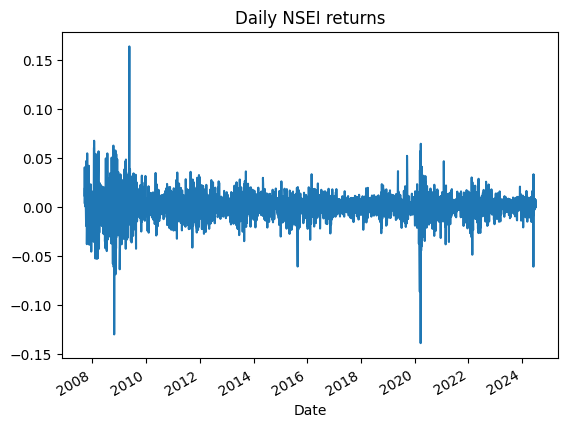

In [31]:
df.log_rtn.plot(title='Daily NSEI returns')

In [32]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

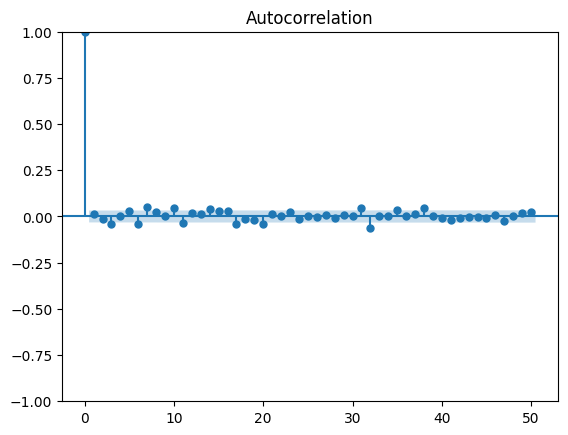

In [33]:
acf = smt.graphics.plot_acf(df.log_rtn,
lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL
)

In [34]:
import matplotlib.pyplot as plt


[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

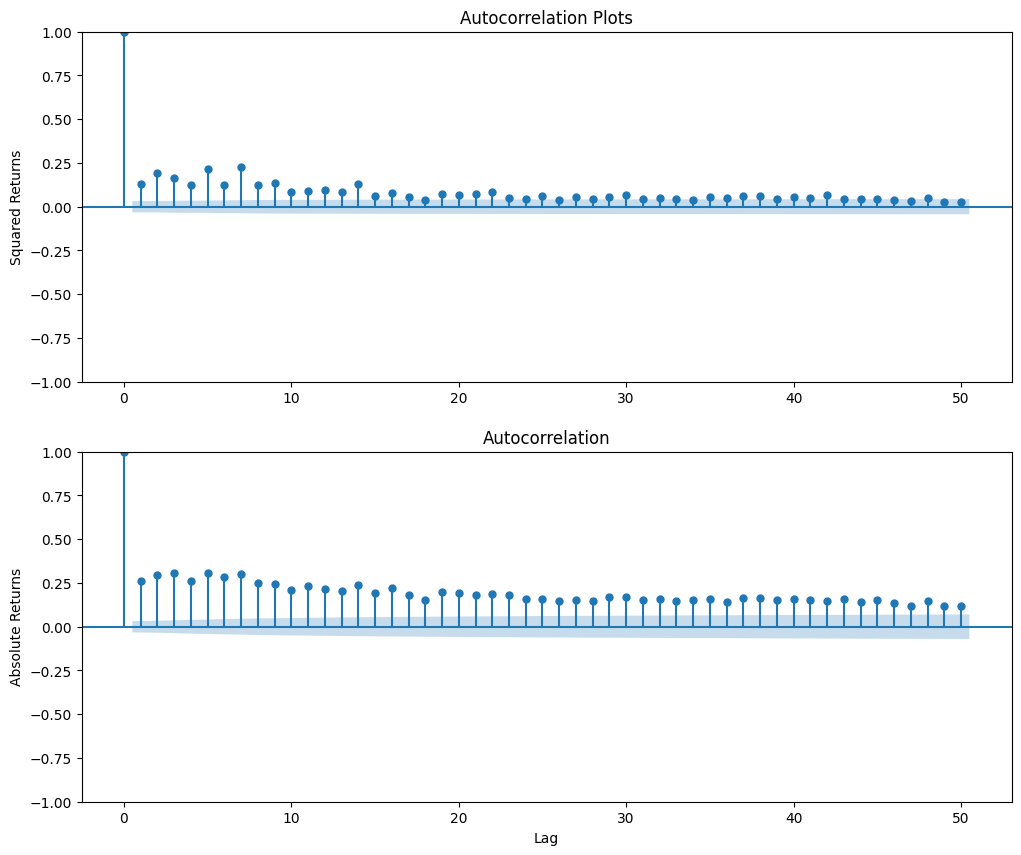

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
ylabel='Squared Returns')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
xlabel='Lag')

In [36]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

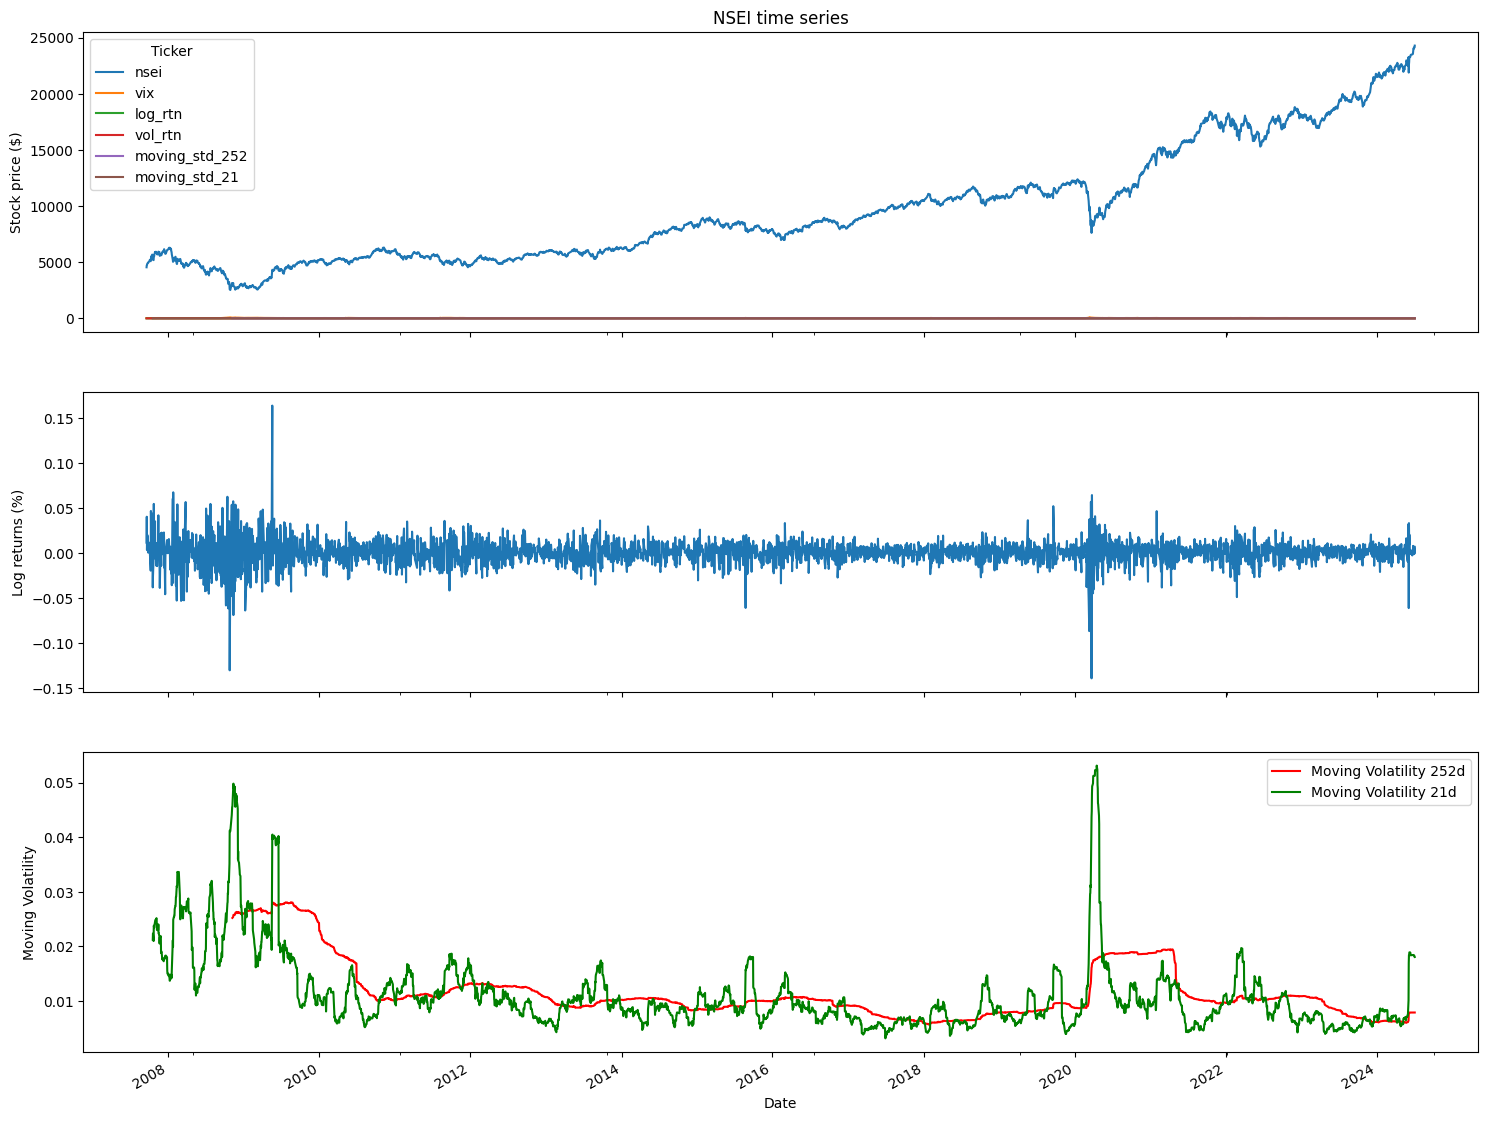

In [37]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
df.plot(ax=ax[0])
ax[0].set(title='NSEI time series',
ylabel='Stock price ($)')
df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
df.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()

**Price S&P500 Analysis with Python**

In [38]:
df = yf.download(['^GSPC', '^VIX'],
start='1985-01-01',
end='2024-07-07',
progress=False)

In [39]:
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^GSPC': 'sp500', '^VIX': 'vix'})

In [40]:
df.tail()

Ticker            sp500    vix
Date                          
2024-06-28  5460.479980  12.44
2024-07-01  5475.089844  12.22
2024-07-02  5509.009766  12.03
2024-07-03  5537.020020  12.09
2024-07-05  5567.189941  12.48

In [41]:
df['log_rtn'] = np.log(df.sp500 / df.sp500.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [42]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

[Text(0.5, 1.0, 'S&P 500 vs. VIX ($\\rho$ = -0.71)'),
 Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'S&P 500 log returns')]

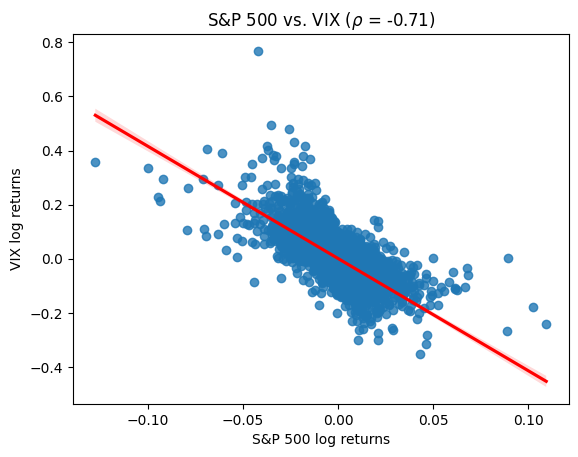

In [43]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
line_kws={'color': 'red'})
ax.set(title=f'S&P 500 vs. VIX ($\\rho$ = {corr_coeff:.2f})',
ylabel='VIX log returns',
xlabel='S&P 500 log returns')

In [44]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

<ipython-input-45-eb812b6d7800>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Q-Q plot')

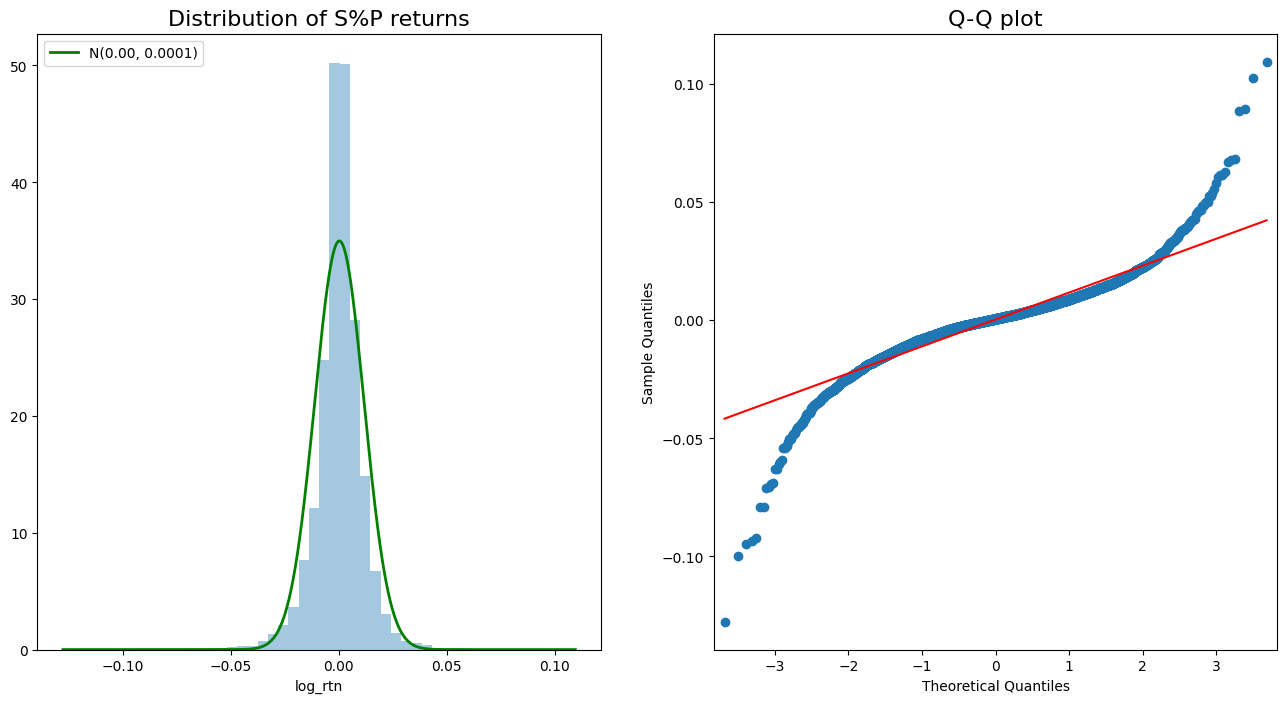

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of S%P returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

In [46]:
df['log_rtn'].tail()

Date
2024-06-28   -0.004092
2024-07-01    0.002672
2024-07-02    0.006176
2024-07-03    0.005072
2024-07-05    0.005434
Name: log_rtn, dtype: float64

<Axes: title={'center': 'Daily S&P500 returns'}, xlabel='Date'>

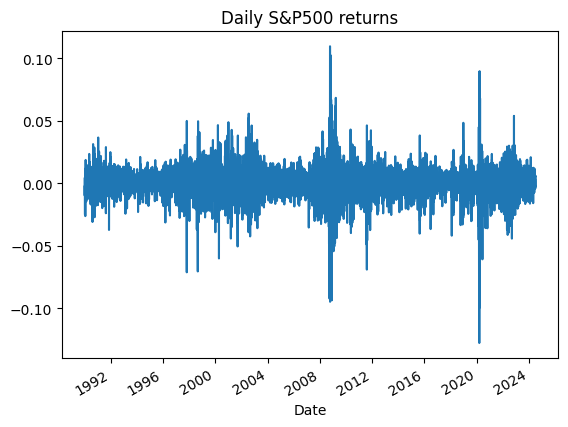

In [47]:
df.log_rtn.plot(title='Daily S&P500 returns')

In [48]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

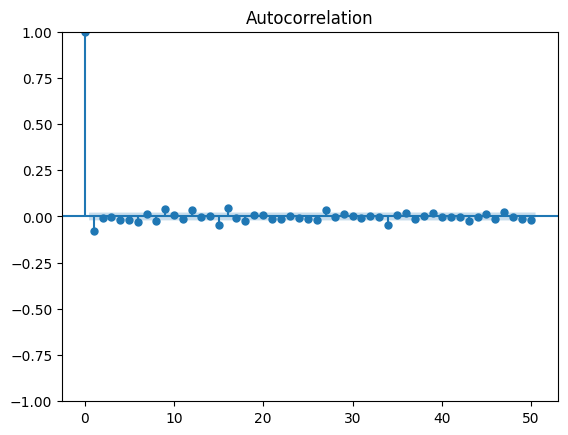

In [49]:

acf = smt.graphics.plot_acf(df.log_rtn,
lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL
)

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

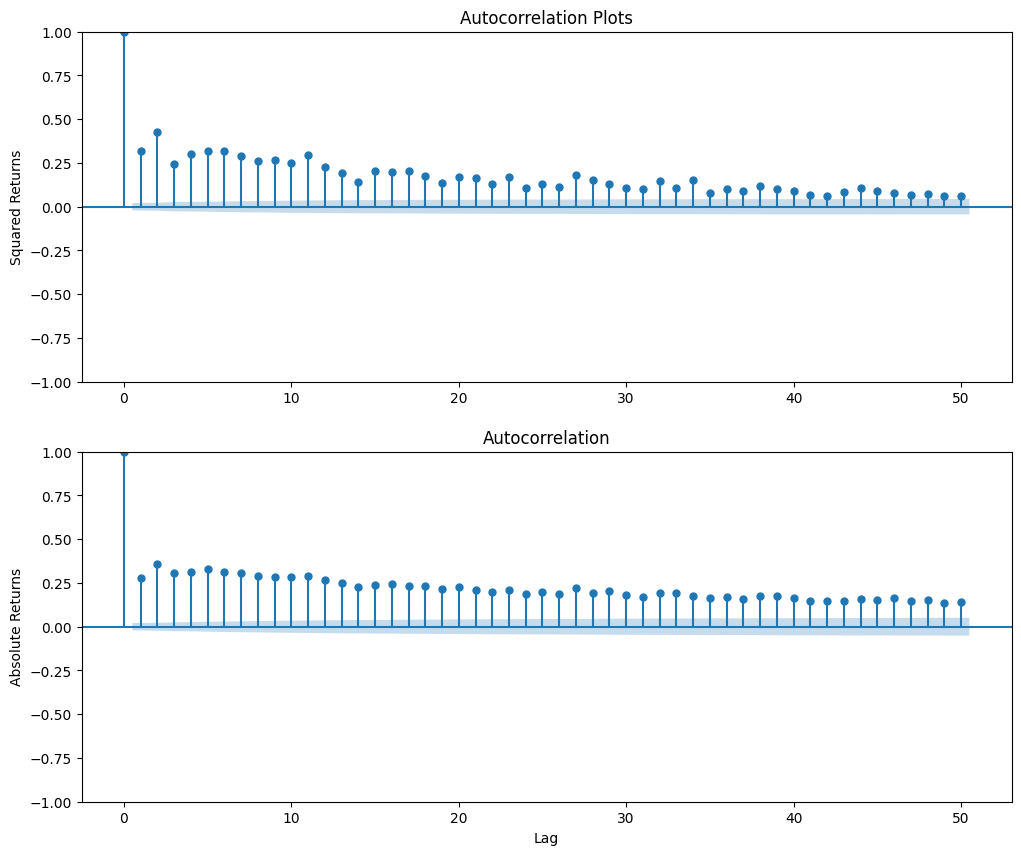

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
ylabel='Squared Returns')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
xlabel='Lag')

In [51]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

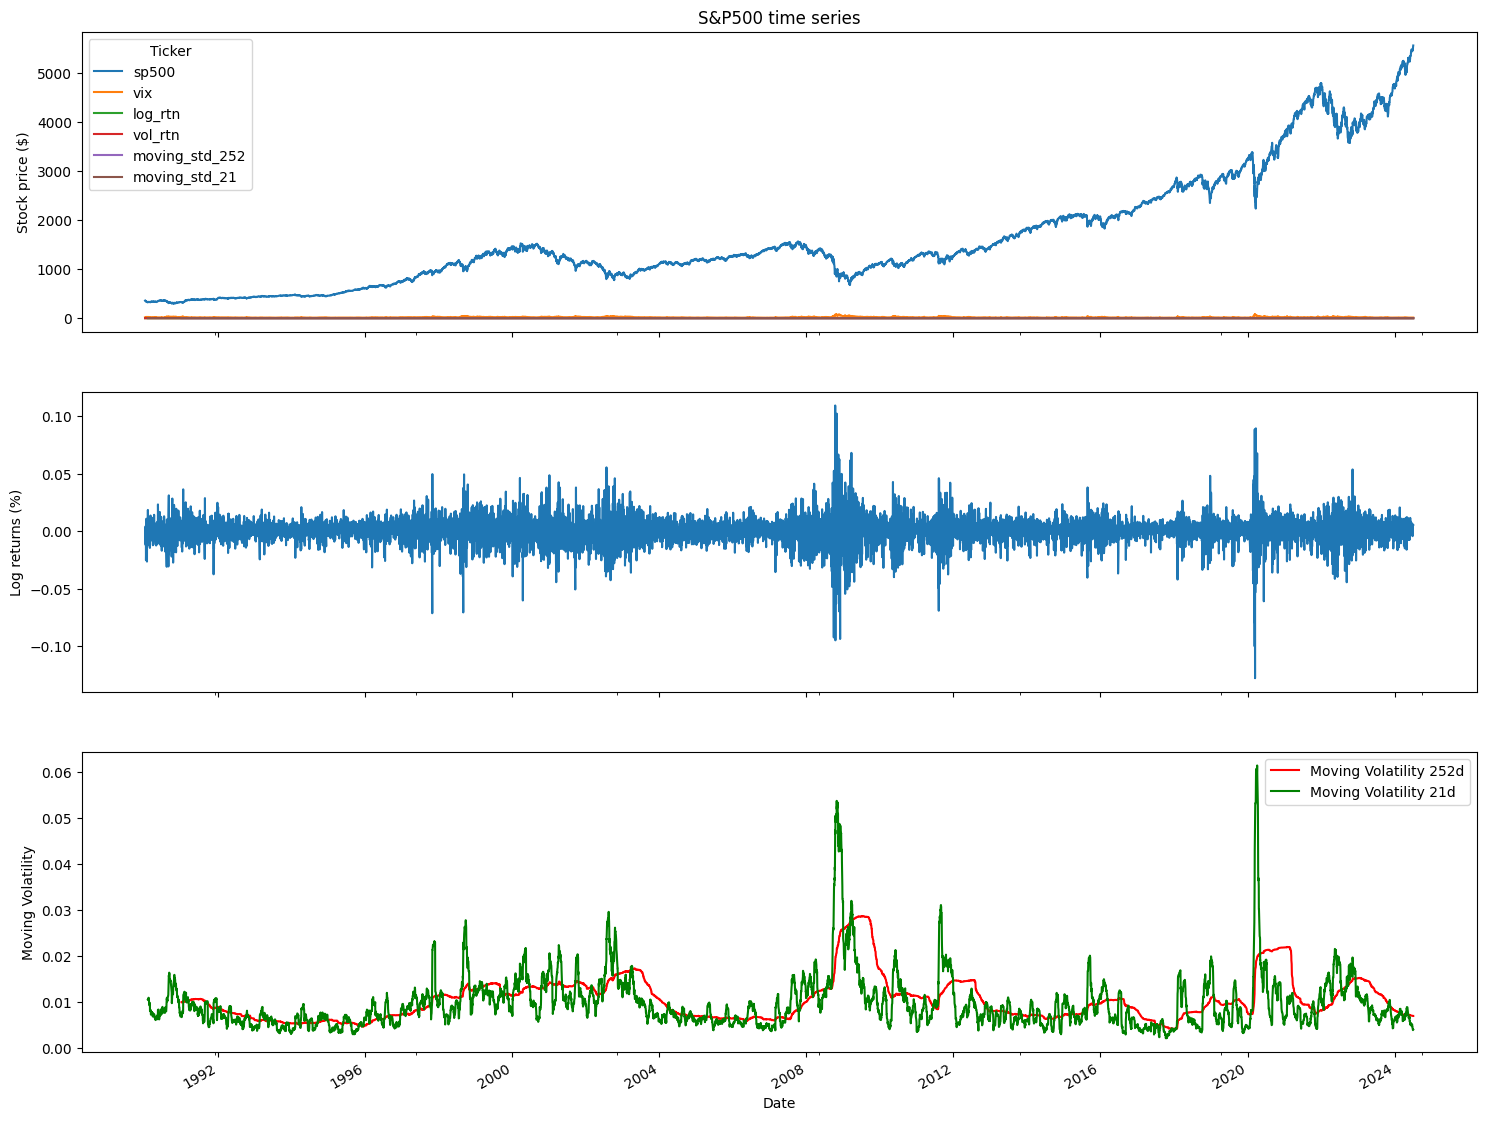

In [52]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
df.plot(ax=ax[0])
ax[0].set(title='S&P500 time series',
ylabel='Stock price ($)')
df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
df.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()